### Materials Project Workshop – August 8–10 2018, Berkeley, California
#### Link to notebook: [http://workshop.materialsproject.org/pymatgen/core/pymatgen_core.ipynb](http://workshop.materialsproject.org/pymatgen/core/pymatgen_core.ipynb)

![pymatgen logo](http://pymatgen.org/_images/pymatgen.png)

# 0. What is pymatgen?

Pymatgen (Python Materials Genomics) is the code that powers all of the scientific analysis behind the Materials Project.  It includes a robust and efficient libraries for the handling of crystallographic structures and molecules, in addition to various mathematical and scientific tools for the handling and generation of materials data.

## 0.0 Core functionality

Here are a few things you can do with pymatgen:

- Create, identify, and manipulate crystal structures and molecules
- Write input and output files for most electronic structure codes
- Analyze density of states, bandstructures, X-ray diffraction spectra
- Perform tensor-based analysis, including elastic and piezoelectric tensors
- Characterize the local chemical environment of structural sites
- Create pourbaix diagrams and phase diagrams
- Match crystal structures to each other and perform symmetry analysis
- Match substrates based on geometry and elastic behavior
- Create and manipulate surfaces
- Do unit conversions
- Get basic information about chemical identity
- Includes a wide variety of other analysis tools, including estimating the cost of a material based on chemical abundance, or its geographical distribution of elements


## 0.1 How do I install pymatgen?

For the workshop, pymatgen has been pre-installed for use in your Jupyter notebooks.

Otherwise, pymatgen can be installed via pip:

`pip install pymatgen`

or conda:

`conda install --channel matsci pymatgen`

We recommend using Python 3.6 or above. Until 2018, pymatgen was developed simultaneously for Python 2.x and 3.x, but following the rest of the Python community we are phasing out support for Python 2.x, and will be developing exclusively for Python 3.x from version 2019.1.1.


## 0.2 Where can I find help and how do I get involved?

* **For general help:** [pymatgen Google Groups mailing list](https://groups.google.com/forum/#!forum/pymatgen) is a place to ask questions.

* **To report bugs:** The [Github Issues](https://github.com/materialsproject/github) page is a good place to report bugs.

* **For Materials Project data and website discussions:** The Materials Project  has its community [Materials Project Discussion](https://discuss.materialsproject.org) forum. 

* **For more example notebooks:** [matgenb](http://matgenb.materialsvirtuallab.org) is a new resource of Jupyter notebooks demonstrating various pymatgen functionality.

If you want specific new features, you're welcome to ask! We try to respond to community needs. If you're a developer and can add the feature yourself, we actively encourage you to do so by creating a Pull Request on Github with your additional functionality. To date, pymatgen has seen over 15,000 commits and over 100 contributors, and we try to have an inclusive and welcoming development community. All contributors are also individually acknowledged on [materialsproject.org/about](https://materialsproject.org/about).


# 1. Verify we have pymatgen installed

First, let's verify we have pymatgen installed. The following command should produce no error or warning:

In [1]:
import pymatgen

/opt/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


We can show the specific version of pymatgen installed:

In [2]:
print(pymatgen.__version__)

2018.8.7


For a list of new features, bug fixes and other changes, consult the [changelog on pymatgen.org](http://pymatgen.org/change_log.html).

You can also see where pymatgen is installed on your computer:

In [3]:
print(pymatgen.__file__)

/opt/conda/lib/python3.5/site-packages/pymatgen/__init__.py


We can also see which version of the Python programming language we are using:

In [4]:
import sys
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


If you have problems or need to report bugs when using pymatgen after the workshop, the above information is often very useful to help us identify the problem.

# 2. Structures and Molecules

Most of the fundamentals of pymatgen are expressed in terms of [**`Structure`**](http://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Structure) and [**`Molecule`**](http://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Molecule) objects.

While we will mostly be using `Structure`, `Stucture` and `Molecule` are very similar conceptually. The main difference i that `Structure` supports full periodicity required to describe crystallographic structures.

Creating a `Structure` is very easy, and can be done in one line, even for complicated crystallographic structures. However, let's start by introducing the simpler `Molecule` object, and then use this understanding of `Molecule` to introduce `Structure`.


## 2.0 Creating a Molecule

Start by importing `Molecule`:

In [5]:
from pymatgen import Molecule

In a Jupyter notebook, you can show help for any Python object by clicking on the object and pressing **Shift+Tab**. This will give you a list of arguments and keyword arguments necessary to construct the object, as well as the documentation ('docstring') which gives more information on what each argument means.

Molecule takes input **arguments** `species` and `coords`, and input **keyword arguments** `charge`, `spin_multiplicity`, `validate_proximity` and `site_properties`.

Keyword arguements come with a default value (the value after the equals sign), and so keyword arguments are optional.

Arguments (without default values) are mandatory.

In [6]:
my_molecule = Molecule(['C','O'], [[0, 0, 0], [0, 0, 1.2]])

In [7]:
print(my_molecule)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 0, Spin Mult = 1
Sites (2)
0 C     0.000000     0.000000     0.000000
1 O     0.000000     0.000000     1.200000


## 2.1 What's in a Molecule? Introducing Sites, Elements and Species

You can access properties of the molecule, such as the Cartesian co-ordinates of its sites:

In [8]:
print(my_molecule.cart_coords)

[[0.  0.  0. ]
 [0.  0.  1.2]]


or properties that are computed on-the-fly such as its centre of mass:

In [9]:
print(my_molecule.center_of_mass)

[0.         0.         0.68544132]


To see the full list of available properties and methods, press **Tab** after typing `my_molecule.` in your Jupyter notebook. There are methods used to modify the molecule, and these take additional argument(s), for example to add a charge to the molecule:

In [10]:
my_molecule.set_charge_and_spin(1)

In [11]:
print(my_molecule)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 1, Spin Mult = 2
Sites (2)
0 C     0.000000     0.000000     0.000000
1 O     0.000000     0.000000     1.200000


A molecule is essentially a list of `Site` objects. We can access these sites like we would a list in Python. For example, to obtain the total number of sites in the molecule:

In [12]:
len(my_molecule)

2

Or to access the first site (note that Python is a 0-indexed programming language, so the first site is site 0):

In [13]:
my_molecule[0]

Site: C (0.0000, 0.0000, 0.0000)

Within this site are information on the site's position in space as well as what that site contains.

In [14]:
# as shorthand, we assign the first site of our molecule to a new variable, site0
site0 = my_molecule[0]

In [15]:
site0.coords

array([0, 0, 0])

In [16]:
site0.specie

Element C

Here, the site olds the element C. In general, a site can hold either an [**`Element`**](http://pymatgen.org/pymatgen.core.periodic_table.html#pymatgen.core.periodic_table.Element), a [**`Specie`**](http://pymatgen.org/pymatgen.core.periodic_table.html#pymatgen.core.periodic_table.Specie) or a [**`Composition`**](http://pymatgen.org/pymatgen.core.composition.html#pymatgen.core.composition.Composition). Let's look at each of these in turn.

In [17]:
from pymatgen import Element, Specie, Composition

An `Element` is simply an element from the Periodic Table.

In [18]:
my_element = Element('C')

Elements have properties such as atomic mass, average ionic radius and more:

In [19]:
my_element.average_ionic_radius

0.3

A `Specie` can contain additional information, such as oxidation state:

In [20]:
Specie('O', oxidation_state=-2)

Specie O2-

Or, for convenience:

In [21]:
Specie.from_string('O2-')

Specie O2-

Finally, a `Composition` is an object that can hold certain amounts of different elements or specie. This is most useful in a disordered Structure, and would rarely be used in a Molecule. For example, this a site that holds 50% Au and 50% Cu would be set as follows:

In [22]:
Composition({'Au': 0.5, 'Cu': 0.5})

Comp: Cu0.5 Au0.5

When we construct a `Molecule`, the input argument will automatically be converted into one of `Element`, `Specie` or `Composition`. Thus, in the previous example, the input `['C', 'O']` was converted to `[Element C, Element O]`.

## 2.2 Creating a Structure and Lattice

Creating a `Structure` is very similar to creating a `Molecule`, except we now also have to specify a `Lattice`. 

In [23]:
from pymatgen import Structure, Lattice

A `Lattice` can be created in one of several ways. Such as by inputting a 3x3 matrix describing the individual lattice vectors. For example, a cubic lattice of length 5 Ångstrom:

In [24]:
my_lattice = Lattice([[5, 0, 0], [0, 5, 0], [0, 0, 5]])

In [25]:
my_lattice

Lattice
    abc : 5.0 5.0 5.0
 angles : 90.0 90.0 90.0
 volume : 125.0
      A : 5.0 0.0 0.0
      B : 0.0 5.0 0.0
      C : 0.0 0.0 5.0

Equivalently, we can create it from its lattice parameters:

In [26]:
my_lattice_2 = Lattice.from_parameters(5, 5, 5, 90, 90, 90)  # a, b, c, alpha, beta, gamma

Or, since we know in this case we have a cubic lattice, so a == b == c and alpha == beta == gamma == 90 degrees, we can simply put:

In [27]:
my_lattice_3 = Lattice.cubic(5)

In all cases, these lattices are the same:

In [28]:
my_lattice == my_lattice_2 == my_lattice_3

True

Now, we can create a crystal structure very easily. Let's start with body-centered-cubic iron:

In [29]:
bcc_fe = Structure(Lattice.cubic(2.8), ["Fe", "Fe"], [[0, 0, 0], [0.5, 0.5, 0.5]])

In [30]:
print(bcc_fe)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


Creating this `Structure` was similar to `Molecule`: we provided a list of elements and a list of positions. However, there are two key differences to `Molecule`: first is that we had to include our `Lattice` object when creating structure, and secondly since we have a lattice, we can define the positions of our sites in *fractional co-ordinates* with respect to that lattice instead of Cartesian co-ordinates.

It's also possible to create an equivalent `Structure` using Cartesian co-ordinates:

In [31]:
bcc_fe_from_cart = Structure(Lattice.cubic(2.8), ["Fe", "Fe"], [[0, 0, 0], [1.4, 1.4, 1.4]],
                             coords_are_cartesian=True)

In [32]:
print(bcc_fe_from_cart)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


We see check that both structures are equivalent:

In [33]:
bcc_fe == bcc_fe_from_cart

True

As in molecule, we can access properties of the structure, such as its volume:

In [34]:
bcc_fe.volume  # in Ångstroms^3

21.951999999999995

## 2.3 Modifying a Structure

We can create a supercell by multiplying the structure by a number of repeats:

In [35]:
bcc_fe_repeated = bcc_fe*(2,2,2)

In [36]:
bcc_fe_repeated

Structure Summary
Lattice
    abc : 5.6 5.6 5.6
 angles : 90.0 90.0 90.0
 volume : 175.61599999999996
      A : 5.6 0.0 0.0
      B : 0.0 5.6 0.0
      C : 0.0 0.0 5.6
PeriodicSite: Fe (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Fe (0.0000, 0.0000, 2.8000) [0.0000, 0.0000, 0.5000]
PeriodicSite: Fe (0.0000, 2.8000, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Fe (0.0000, 2.8000, 2.8000) [0.0000, 0.5000, 0.5000]
PeriodicSite: Fe (2.8000, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Fe (2.8000, 0.0000, 2.8000) [0.5000, 0.0000, 0.5000]
PeriodicSite: Fe (2.8000, 2.8000, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Fe (2.8000, 2.8000, 2.8000) [0.5000, 0.5000, 0.5000]
PeriodicSite: Fe (1.4000, 1.4000, 1.4000) [0.2500, 0.2500, 0.2500]
PeriodicSite: Fe (1.4000, 1.4000, 4.2000) [0.2500, 0.2500, 0.7500]
PeriodicSite: Fe (1.4000, 4.2000, 1.4000) [0.2500, 0.7500, 0.2500]
PeriodicSite: Fe (1.4000, 4.2000, 4.2000) [0.2500, 0.7500, 0.7500]
PeriodicSite: Fe (4.2000, 1.

There are many methods to modify the structure, such as scaling the volume or substituting one species with another species. There are also various *transformations* in pymatgen that can do more complicated structure manipulations, such as creating surfaces, grain boundaries or creating ordered approximations of disordered structure.

## 2.4 Creating Structure from Spacegroups

Structures can also be created directly from their spacegroup:

In [37]:
bcc_fe = Structure.from_spacegroup("Im-3m", Lattice.cubic(2.8), ["Fe"], [[0, 0, 0]])
print(bcc_fe)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


In [38]:
nacl = Structure.from_spacegroup("Fm-3m", Lattice.cubic(5.692), ["Na+", "Cl-"],
                                 [[0, 0, 0], [0.5, 0.5, 0.5]])
print(nacl)

Full Formula (Na4 Cl4)
Reduced Formula: NaCl
abc   :   5.692000   5.692000   5.692000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Na+   0    0    0
  1  Na+   0    0.5  0.5
  2  Na+   0.5  0    0.5
  3  Na+   0.5  0.5  0
  4  Cl-   0.5  0.5  0.5
  5  Cl-   0.5  0    0
  6  Cl-   0    0.5  0
  7  Cl-   0    0    0.5


## 2.5 Creating a Disordered Structure

Disordered structures are created using the syntax for compositions shown earlier. Here, we create a CuAu solid solution:

In [39]:
composition = {"Cu": 0.5, "Au":0.5}
cu_au = Structure.from_spacegroup("Fm-3m", Lattice.cubic(3.677), [composition], [[0, 0, 0]])
print(cu_au)

Full Formula (Cu2 Au2)
Reduced Formula: CuAu
abc   :   3.677000   3.677000   3.677000
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP                    a    b    c
---  ------------------  ---  ---  ---
  0  Cu:0.500, Au:0.500  0    0    0
  1  Cu:0.500, Au:0.500  0    0.5  0.5
  2  Cu:0.500, Au:0.500  0.5  0    0.5
  3  Cu:0.500, Au:0.500  0.5  0.5  0


# 3. Input and Output

## 3.0 Input/output from other standard file formats

Pymatgen supports a wide range of input/output.

* **Plane-wave DFT codes** including:
  * [VASP](https://www.vasp.at)
  * [Quantum ESPRESSO pwscf](https://www.quantum-espresso.org)
  * [ABINIT](https://www.abinit.org)
  * [exciting](http://exciting-code.org)
* **Quantum chemistry codes** including:
  * [Q-Chem](http://www.q-chem.com)
  * [Gaussian](http://gaussian.com)
  * [NWChem](http://www.nwchem-sw.org/index.php/Main_Page)
* **Visualization and standard file formats** including:
  * [CIF](https://www.iucr.org/resources/cif)
  * [XCrySDen](http://www.xcrysden.org)
  * [xyz](https://en.wikipedia.org/wiki/XYZ_file_format)
* **Many others, including ...**
    * [AiiDA](http://www.aiida.net)
    * [FEFF](http://feff.phys.washington.edu)
    * [ADF](https://www.scm.com/doc/ADF/index.html)
    * [LAMMPS](https://lammps.sandia.gov)
    * [Zeo++](http://www.zeoplusplus.org)
    * [Fiesta](http://perso.neel.cnrs.fr/xavier.blase/fiesta/)
    * [Phonopy](https://atztogo.github.io/phonopy/)
    * CSSR
    * xr
    * [ATAT (mcsqs)](https://www.brown.edu/Departments/Engineering/Labs/avdw/atat/)
    * [LOBSTER](http://www.cohp.de)
* **and also adaptors to use input/output routines from other codes** including:
  * [Atomic Simulation Environment (ASE)](https://wiki.fysik.dtu.dk/ase/)
  * [Open Babel](http://openbabel.org/wiki/Main_Page)

For example, let's import from a CIF file:

In [40]:
struct = Structure.from_file('Nb2O5.cif')
print(struct)

/opt/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Full Formula (Nb16 O40)
Reduced Formula: Nb2O5
abc   :   3.861885  14.714739  15.436378
angles: 104.895922  97.185452  97.526606
Sites (56)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Nb    0.169637  0.247074  0.096428
  1  Nb    0.305803  0.511873  0.097557
  2  Nb    0.961103  0.023003  0.898803
  3  Nb    0.329079  0.328964  0.371122
  4  Nb    0.636261  0.67209   0.628918
  5  Nb    0.828076  0.753513  0.903124
  6  Nb    0.532266  0.408998  0.631902
  7  Nb    0.78282   0.939912  0.628586
  8  Nb    0.693758  0.488348  0.901824
  9  Nb    0.038548  0.978004  0.100936
 10  Nb    0.219435  0.060975  0.370982
 11  Nb    0.557784  0.216612  0.899574
 12  Nb    0.61544   0.862139  0.365606
 13  Nb    0.387379  0.138624  0.633853
 14  Nb    0.465408  0.592161  0.368071
 15  Nb    0.440698  0.783598  0.099606
 16  O     0.642207  0.232525  0.055067
 17  O     0.628144  0.344071  0.910055
 18  O     0.297975  0.092069  0.501416
 19  O     0.128816 

There is a lot of additional functionality in pymatgen for several of these codes, including automating the generation of sensible input *sets* (configuration files for various codes, including VASP).

# 3.1 Input/output within Materials Project codes

Most objects like `Structure` in Materials Project codes including pymatgen and also [atomate](https://atomate.org), [custodian](https://pythonhosted.org/custodian/), [FireWorks](https://materialsproject.github.io/fireworks/), are "MSONable", named after "Monty JSON" from the [monty](http://guide.materialsvirtuallab.org/monty/) package. This means they can be easily converted to and from the JSON file format. This makes it really easy for us to pass objects between the different codes, and also to store them in a database like [MongoDB](https://www.mongodb.com) or save them to disk.

Generally, objects that are MSONable will have `.as_dict()` and `.from_dict()` methods. To save or load from disk, the helpful `dumpfn` and `loadfn` functions from Monty can be used. These allow you to save not just, for example, a single `Structure` object, but a list or dictionary of many kinds of objects in Materials Project codes.

In [41]:
from monty.serialization import dumpfn, loadfn

In [42]:
dumpfn(bcc_fe, "bcc_fe.json")
new_struct = loadfn("bcc_fe.json")
bandstructure = loadfn("li2o_bs.json")

In [43]:
bcc_fe.as_dict()

{'@class': 'Structure',
 '@module': 'pymatgen.core.structure',
 'charge': None,
 'lattice': {'a': 2.8,
  'alpha': 90.0,
  'b': 2.8,
  'beta': 90.0,
  'c': 2.8,
  'gamma': 90.0,
  'matrix': [[2.8, 0.0, 0.0], [0.0, 2.8, 0.0], [0.0, 0.0, 2.8]],
  'volume': 21.951999999999995},
 'sites': [{'abc': [0.0, 0.0, 0.0],
   'label': 'Fe',
   'species': [{'element': 'Fe', 'occu': 1}],
   'xyz': [0.0, 0.0, 0.0]},
  {'abc': [0.5, 0.5, 0.5],
   'label': 'Fe',
   'species': [{'element': 'Fe', 'occu': 1}],
   'xyz': [1.4, 1.4, 1.4]}]}

# 3.3 A Note on Visualizing Structures

The usual way to visualize your structure is to export to a format like CIF and open in a program like VESTA or CrystalMaker. For this workshop, we have a new tool (in beta) to make this easier. To view your structure, you can do it like so:

In [44]:
from mp_workshop import get_viewer_link

In [66]:
get_viewer_link(nacl)

# 4. Symmetry Analysis with SymmetryAnalyzer

In addition to book-keeping of structures using `Structure` objects, pymatgen contains powerful tools for analyzing crystal symmetry and comparing structures.  The `SymmetryAnalyzer` object uses the powerful spglib symmetry analysis library, which is written in C for more efficient determination of invariant symmetry operations and crystal symmetry. 
The symmetry analyzer can be used to get primitive and standardized conventional cell settings of structures.

These examples shows how to get the primitive structure of BCC iron using `SpacegroupAnalyzer` and how to get the point group of the CO molecule created above using `PointGroupAnalyzer`.

In [46]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer, PointGroupAnalyzer

In [47]:
sga = SpacegroupAnalyzer(bcc_fe)
prim = sga.get_primitive_standard_structure()
print(prim)  # note the primitive structure has only a single site

Full Formula (Fe1)
Reduced Formula: Fe
abc   :   2.424871   2.424871   2.424871
angles: 109.471221 109.471221 109.471221
Sites (1)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe      1    1    0


In [48]:
std = sga.get_conventional_standard_structure()  # whereas the conventional structure has two
print(std)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0.5  0.5  0.5
  1  Fe    0    0    0


In [49]:
print("Crystal system:", sga.get_crystal_system())
print("Spacegroup symbol:", sga.get_space_group_symbol())

Crystal system: cubic
Spacegroup symbol: Im-3m


Similarly, we can use `PointGroupAnalyzer` to get the point group of a molecule:

In [50]:
pga = PointGroupAnalyzer(my_molecule)
print(pga.get_pointgroup())

C*v


# 5. Example of calculating X-ray Diffraction (XRD) Pattern

There are various tools in pymatgen that allow for the analysis and plotting of structural and electronic information.  The `XRDCalculator` is perhaps the most straightforward of these tools, since it only requires a `Structure` object.

In [51]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
xrdc = XRDCalculator()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

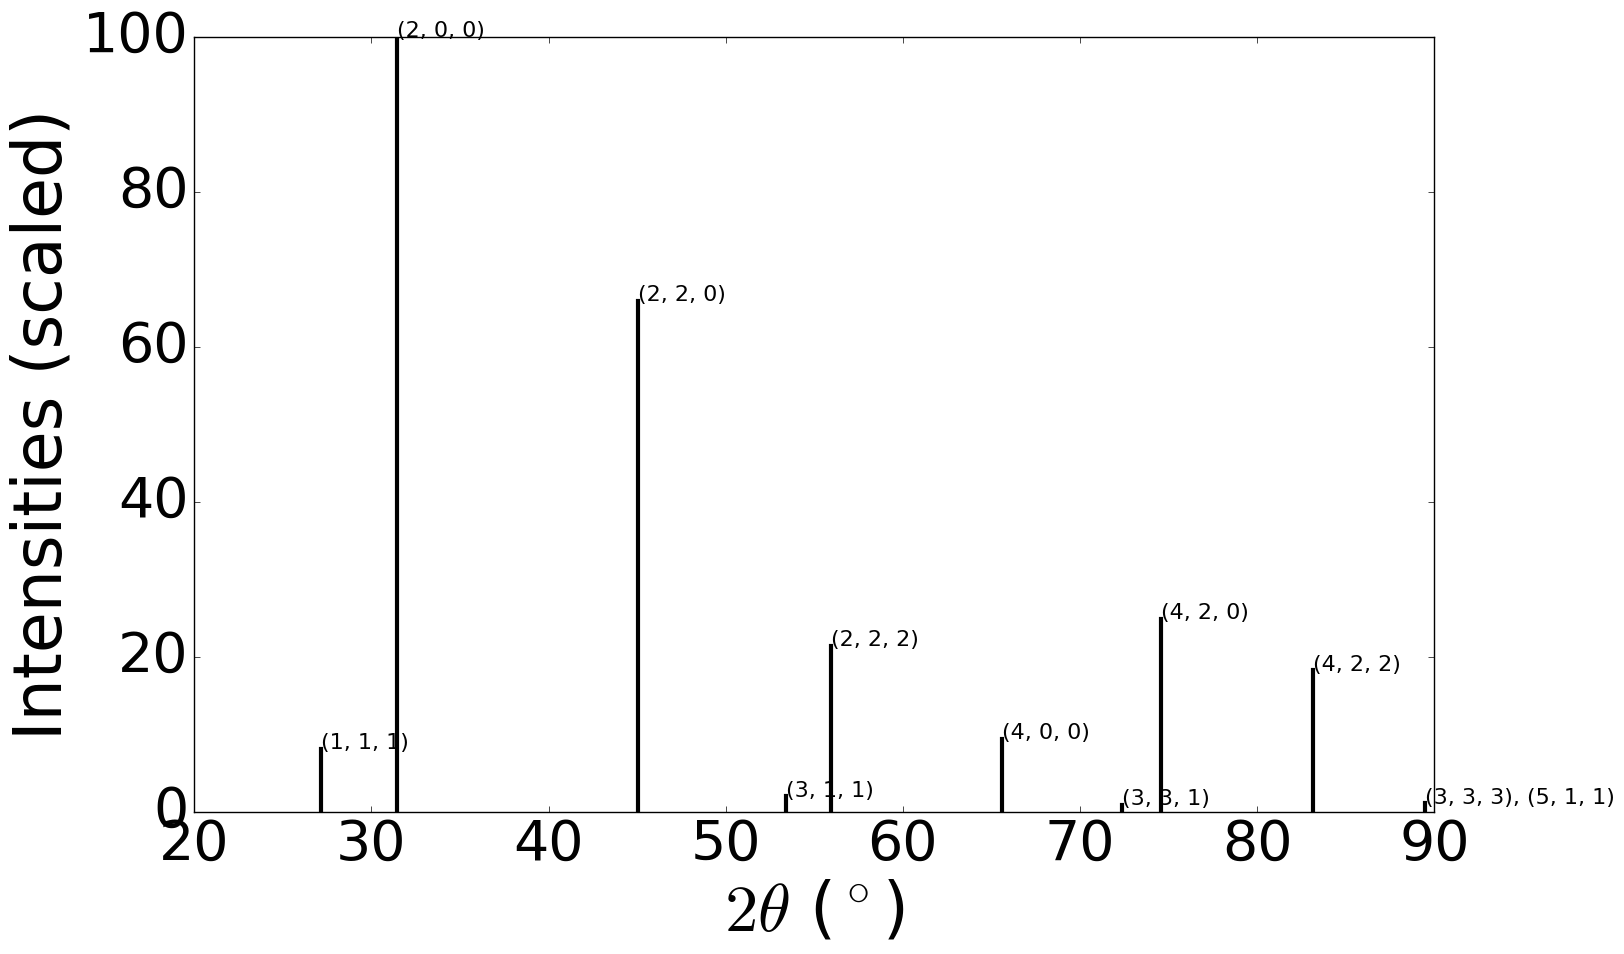

In [52]:
xrdc.get_plot(nacl)  # plot the XRD pattern of NaCl

## 6.0 Matching an unknown structure to an XRD pattern

Consider an experimentalist obtains an XRD structure of a cathode material of composition Li$_x$S$_y$, but unknown crystallographic structure:

![LiS XRD](https://raw.githubusercontent.com/materialsproject/workshop-2017/master/pymatgen/core/LiS_XRD.png)

We can generate a series of XRD plots for different structures in the Li-S chemical system to find one that matches. Later, we will show how to obtain these structures from the Materials Project database, but for now let's load them from a file:

In [53]:
lis_structures = loadfn("li_s_structures.json")

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

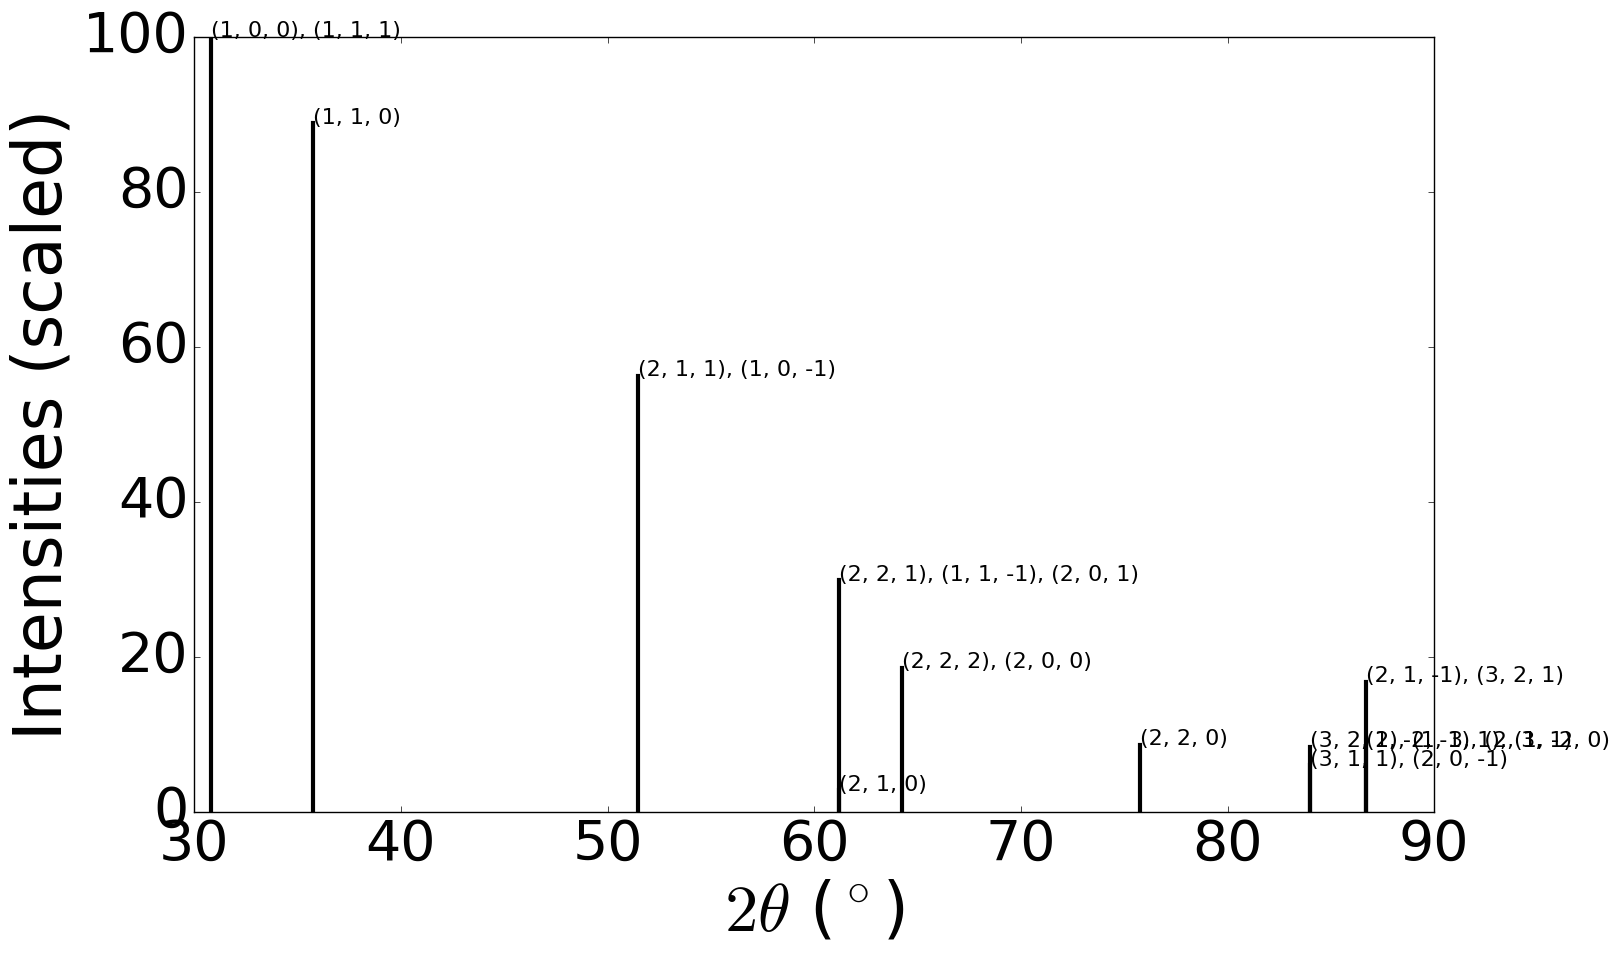

In [54]:
xrdc.get_plot(lis_structures[0])  # let's examine each in turn, starting with the first (0)

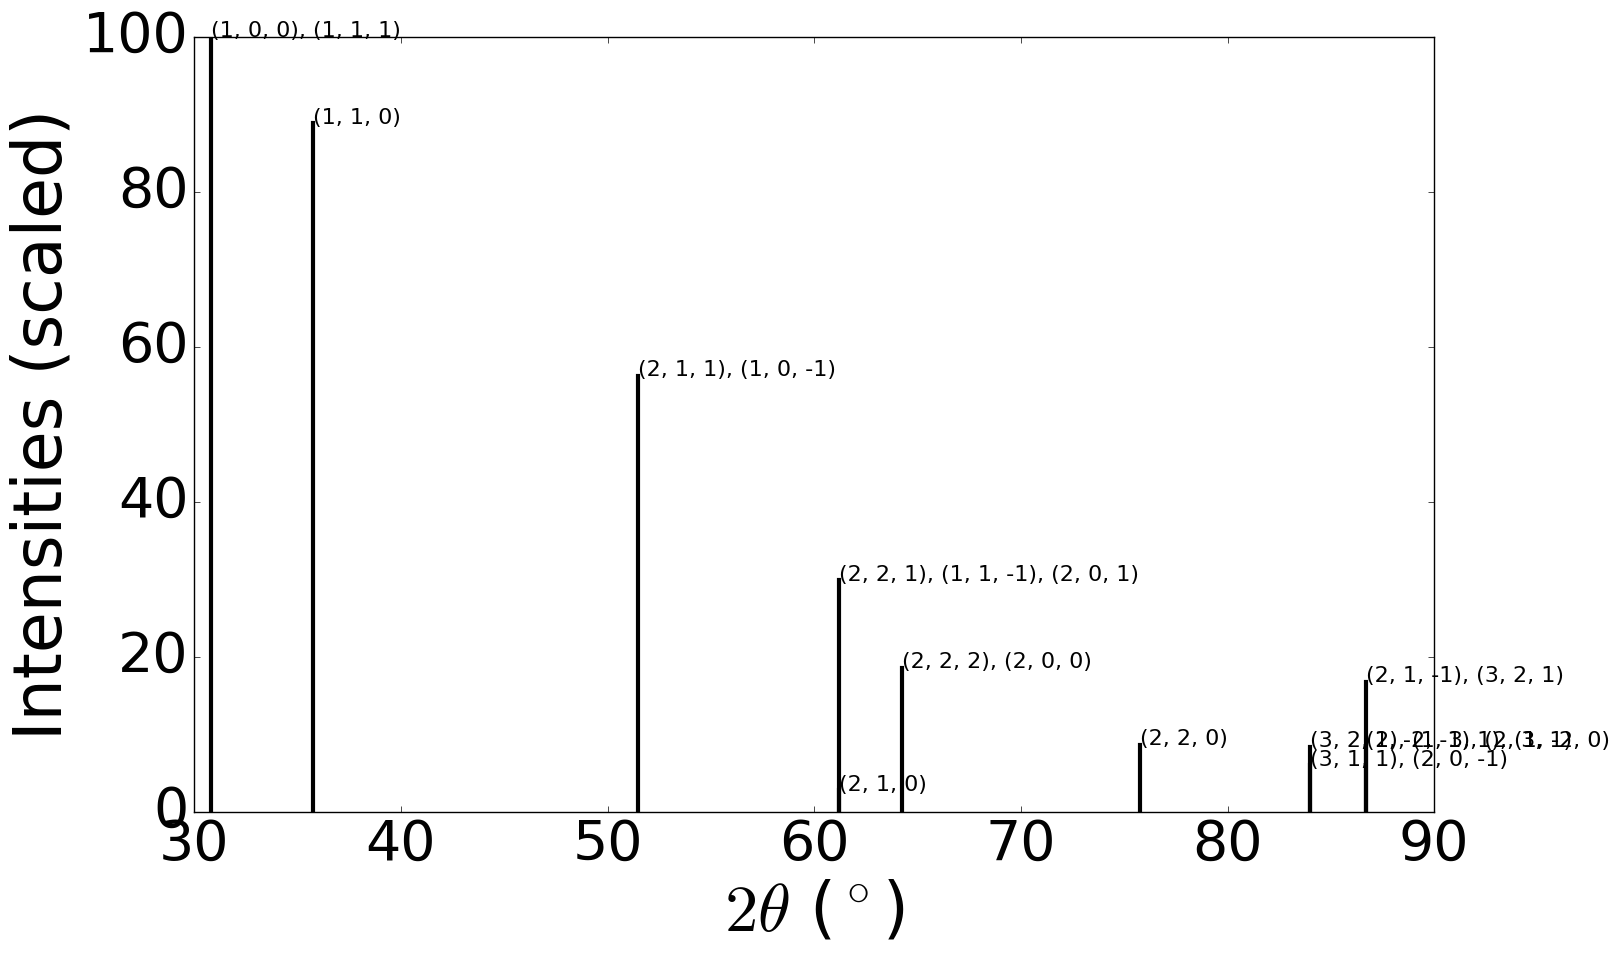

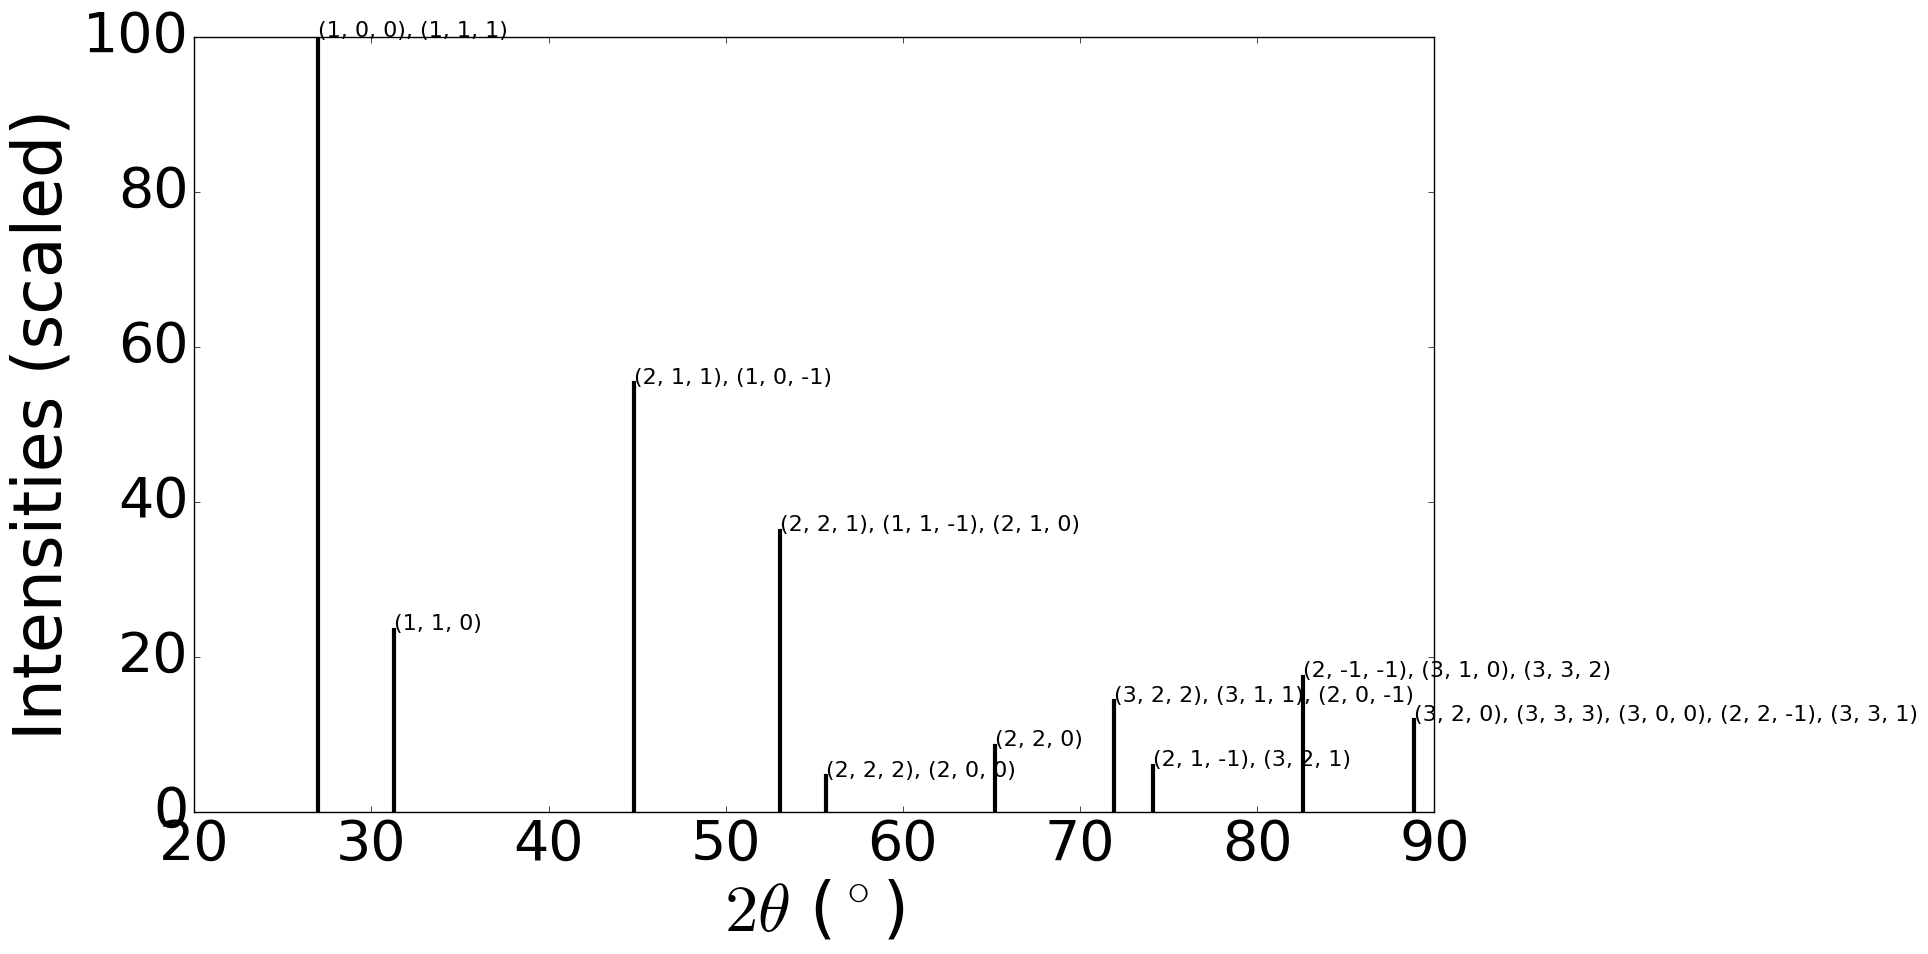

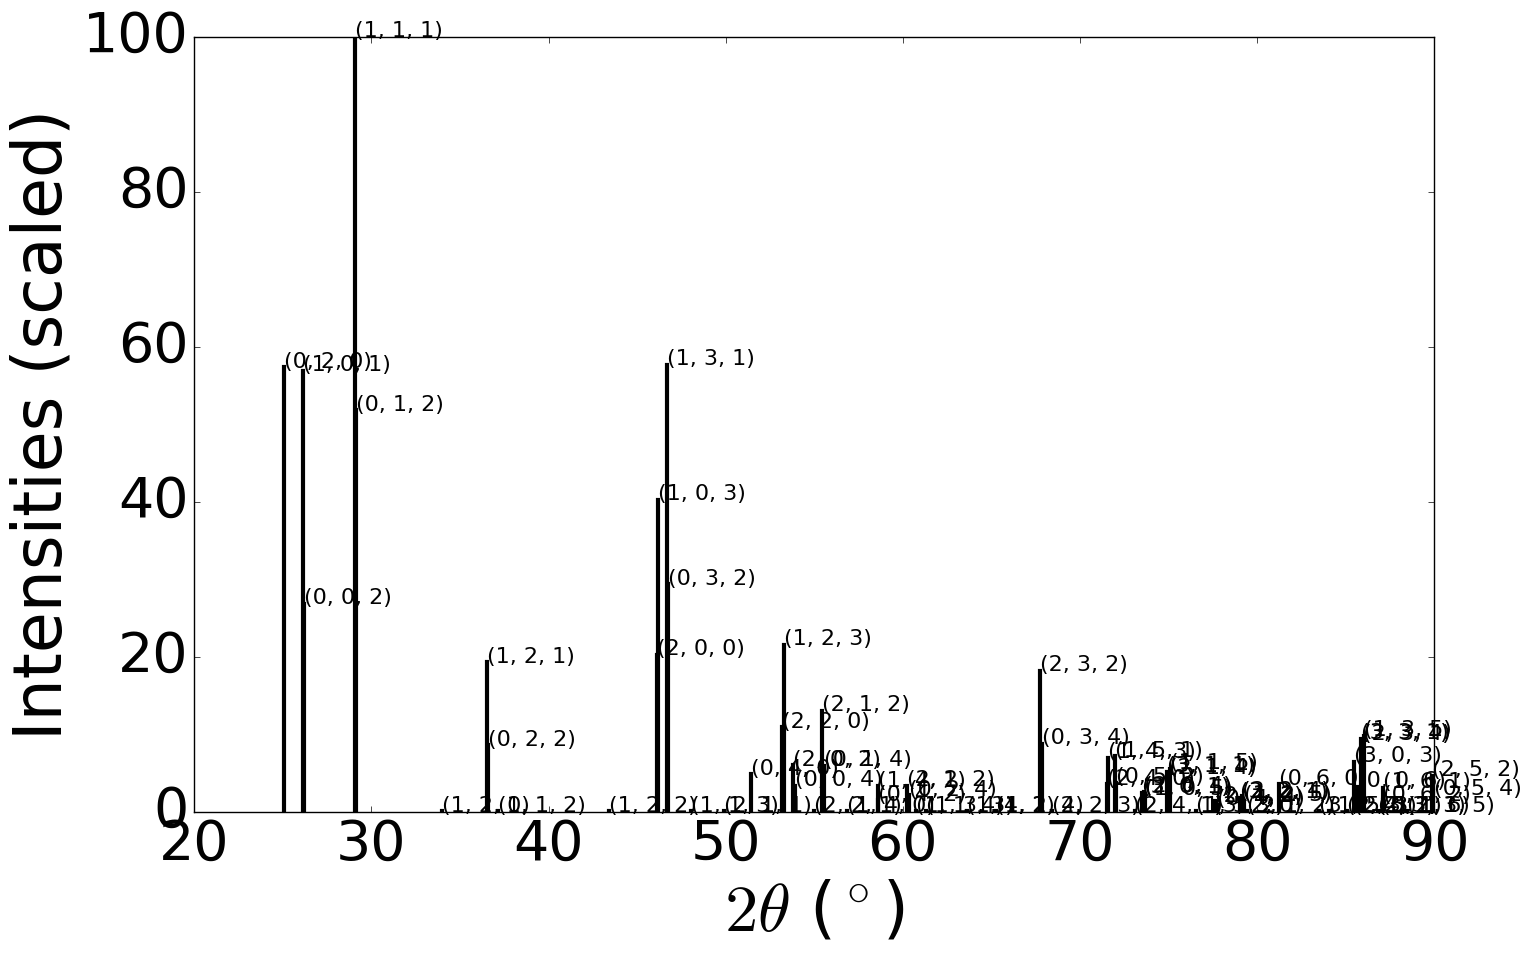

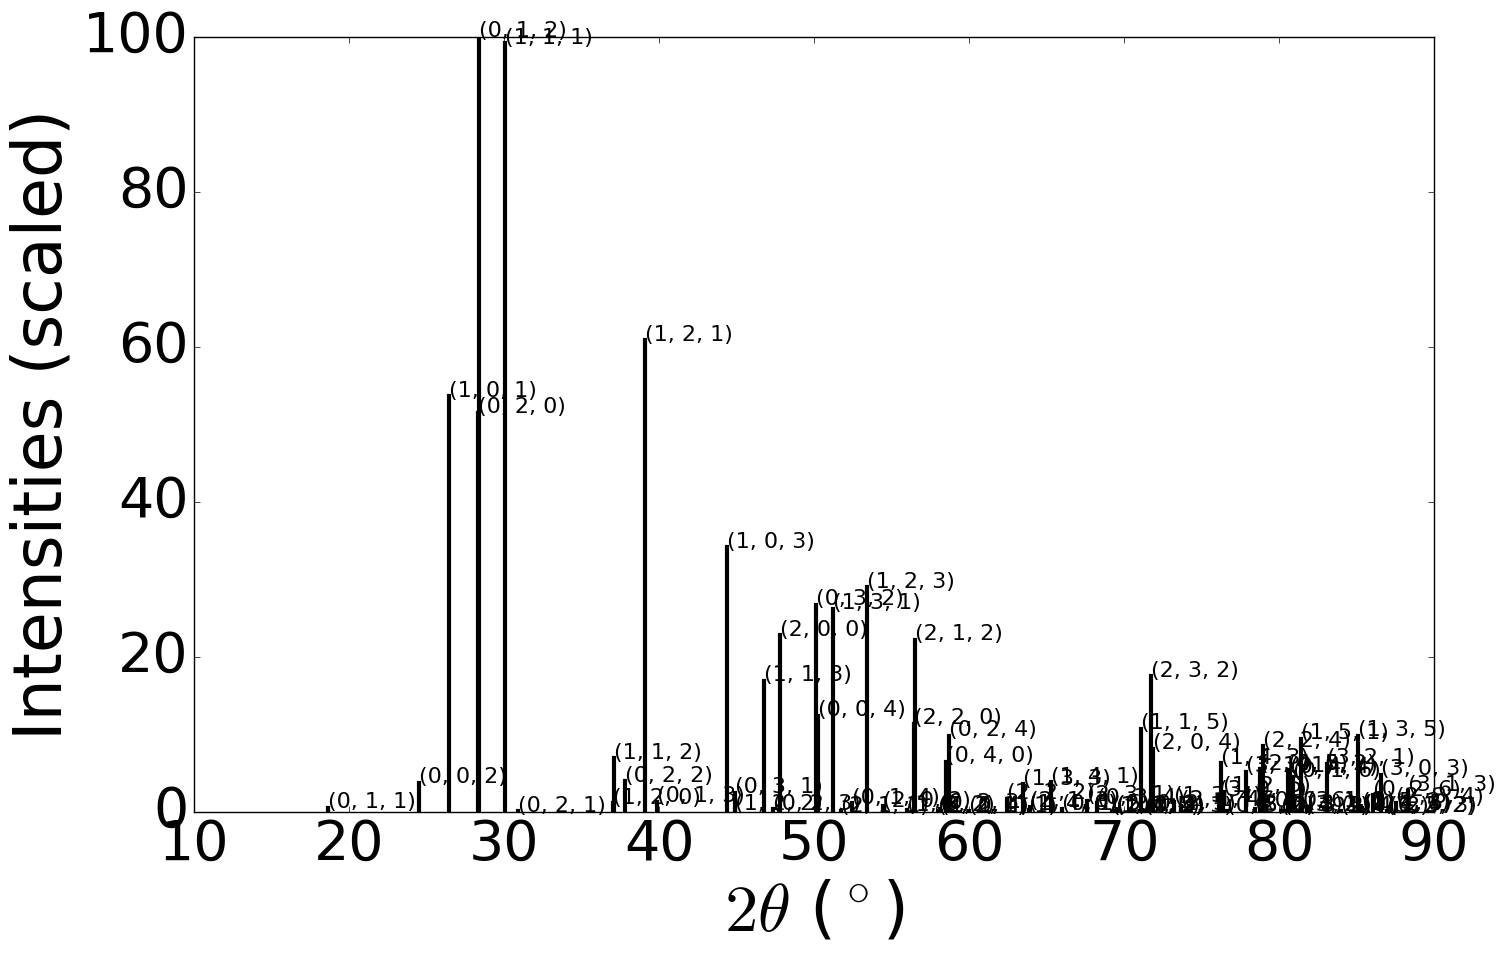

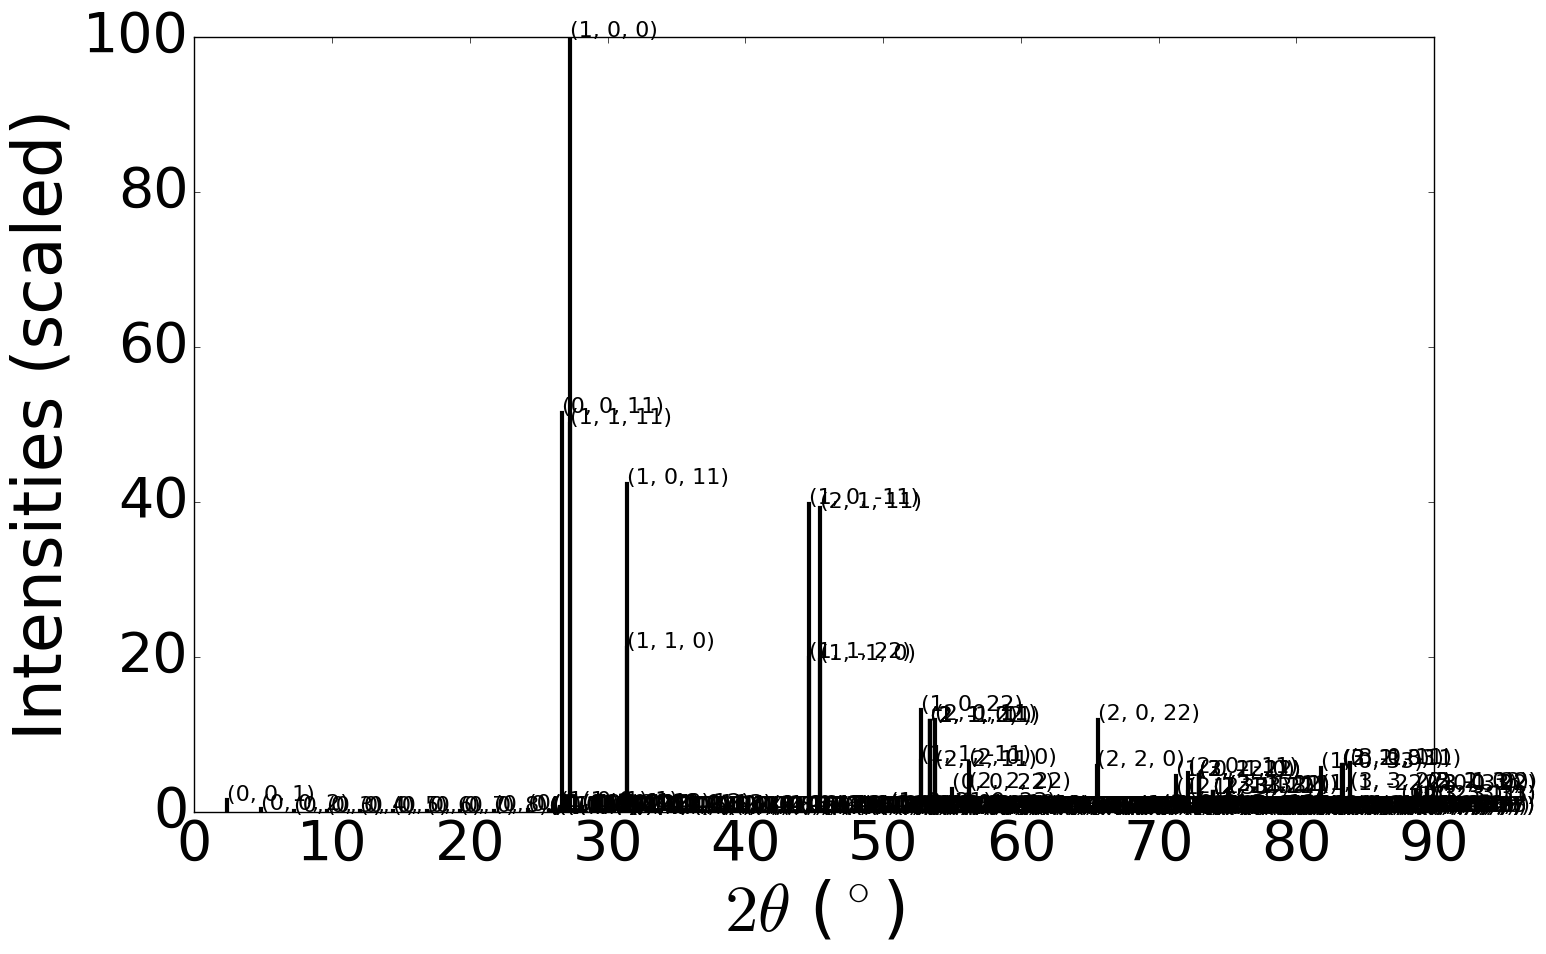

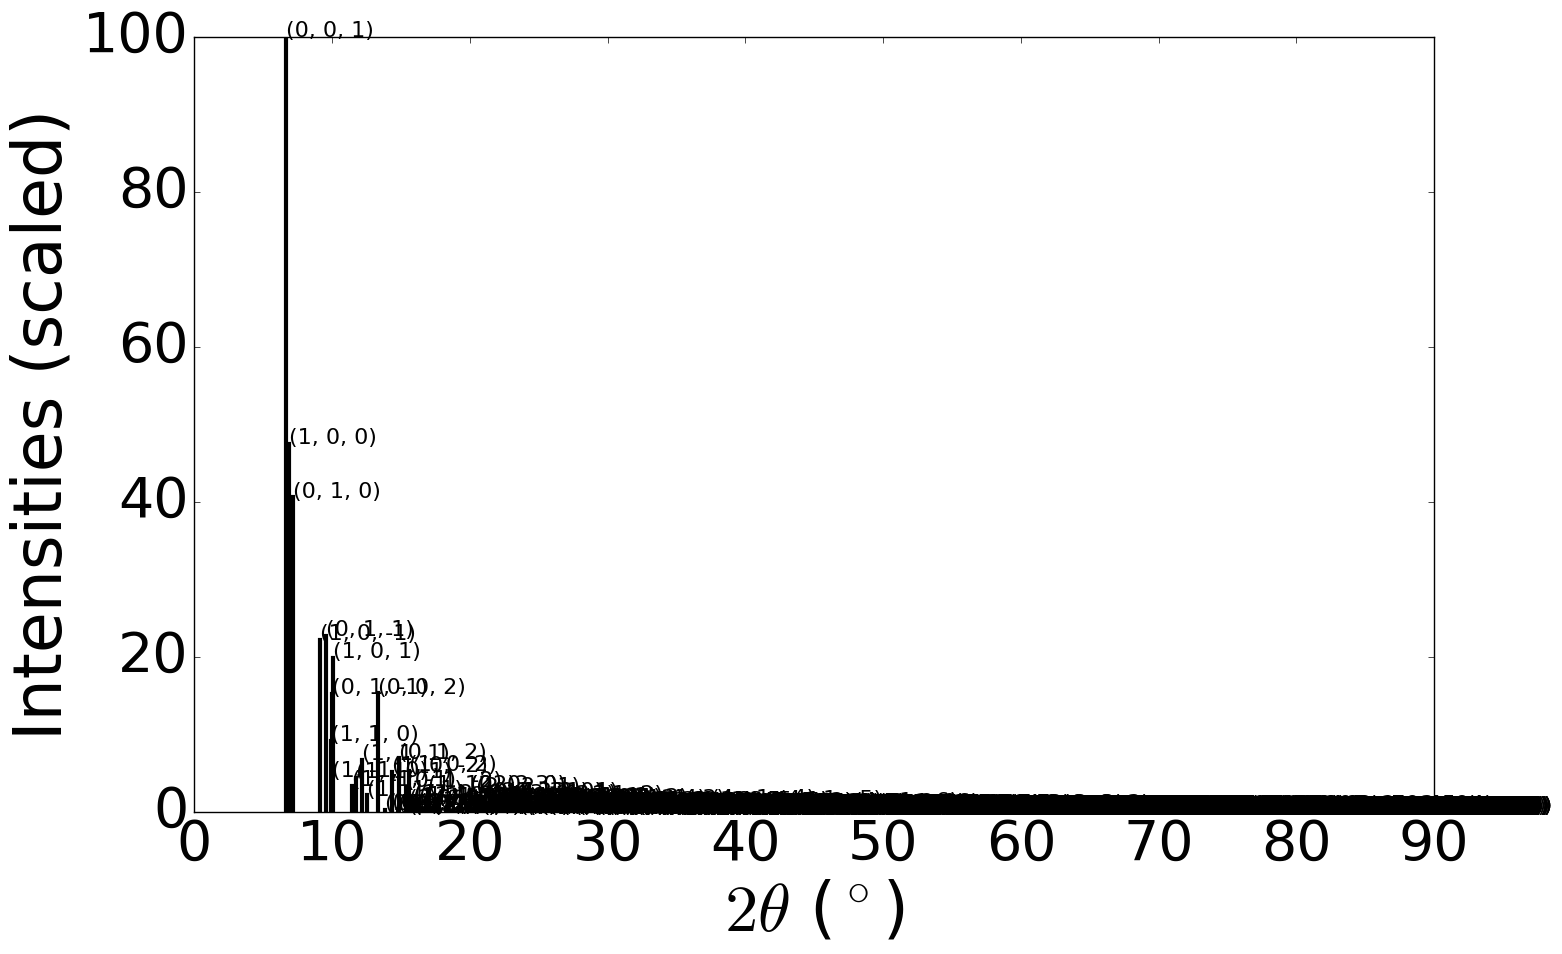

In [55]:
for structure in lis_structures:
    xrdc.get_plot(structure)

# 6. Example: Creating a surface

Here, we show how to generate all of the low-index facets for BCC Fe.

In [56]:
from pymatgen.core.surface import generate_all_slabs

/opt/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [57]:
slabs = generate_all_slabs(bcc_fe, 1, 4, 10)

In [58]:
first_slab = slabs[0]
print(first_slab)

Slab Summary (Fe6)
Reduced Formula: Fe
Miller index: (1, 1, 1)
Shift: 0.2500, Scale Factor: [[-1  1  0]
 [-1  0  1]
 [ 1  0  0]]
abc   :   3.959798   3.959798  28.000000
angles: 135.000000 135.000000  60.000000
Sites (6)
1 Fe     0.000000     0.000000     0.075000
2 Fe     0.500000     0.500000     0.025000
3 Fe     0.000000     0.000000     0.175000
4 Fe     0.500000     0.500000     0.125000
5 Fe     0.000000     0.000000     0.275000
6 Fe     0.500000     0.500000     0.225000


In [59]:
for slab in slabs:
    print(slab.miller_index)

(1, 1, 1)
(1, 1, 0)
(1, 0, 0)


# 7. Example: Manipulating Tensors

Here, we show how to fit a "noisy" tensor to a provided crystal structure,

In [60]:
import numpy as np
from pymatgen.analysis.elasticity.elastic import ElasticTensor

/opt/conda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [61]:
data = loadfn("sample_elastic.json")
print(data)

[Structure Summary
Lattice
    abc : 5.468727957196488 5.468727957196488 5.468727957196488
 angles : 90.0 90.0 90.00000000000001
 volume : 163.55316755428728
      A : 5.468727957196488 0.0 3.348630094094161e-16
      B : -3.348630094094161e-16 5.468727957196488 3.348630094094161e-16
      C : 0.0 0.0 5.468727957196488
PeriodicSite: Si (2.7344, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Si (4.1015, 4.1015, 4.1015) [0.7500, 0.7500, 0.7500]
PeriodicSite: Si (2.7344, 2.7344, 2.7344) [0.5000, 0.5000, 0.5000]
PeriodicSite: Si (4.1015, 1.3672, 1.3672) [0.7500, 0.2500, 0.2500]
PeriodicSite: Si (0.0000, 0.0000, 2.7344) [0.0000, 0.0000, 0.5000]
PeriodicSite: Si (1.3672, 4.1015, 1.3672) [0.2500, 0.7500, 0.2500]
PeriodicSite: Si (-0.0000, 2.7344, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Si (1.3672, 1.3672, 4.1015) [0.2500, 0.2500, 0.7500], [[143.99, 53.58, 53.53, 0.13, 0.41, 0.06], [52.89, 143.62, 53.18, 0.61, 0.67, 0.21], [53.19, 52.97, 144.04, 0.25, 0.55, 0.01], [0.97, 0.69, 0

In [62]:
si_struct = data[0]
elastic_tensor = ElasticTensor.from_voigt(data[1])

In [63]:
print(np.array(data[1]))

[[1.4399e+02 5.3580e+01 5.3530e+01 1.3000e-01 4.1000e-01 6.0000e-02]
 [5.2890e+01 1.4362e+02 5.3180e+01 6.1000e-01 6.7000e-01 2.1000e-01]
 [5.3190e+01 5.2970e+01 1.4404e+02 2.5000e-01 5.5000e-01 1.0000e-02]
 [9.7000e-01 6.9000e-01 4.7000e-01 7.5090e+01 3.5000e-01 0.0000e+00]
 [7.7000e-01 6.8000e-01 4.1000e-01 6.0000e-02 7.4710e+01 9.2000e-01]
 [1.7000e-01 6.6000e-01 4.9000e-01 1.7000e-01 1.3000e-01 7.5070e+01]]


In [64]:
print(elastic_tensor.fit_to_structure(si_struct).voigt.round(2))

[[143.88  53.22  53.22   0.     0.    -0.  ]
 [ 53.22 143.88  53.22   0.     0.    -0.  ]
 [ 53.22  53.22 143.88   0.     0.    -0.  ]
 [  0.     0.     0.    74.96  -0.     0.  ]
 [  0.     0.     0.    -0.    74.96   0.  ]
 [ -0.    -0.    -0.     0.     0.    74.96]]


# Summary

This notebook is intended to provide a short introduction to some of the functionality of pymatgen. We've examined the building blocks of pymatgen: the `Structure` and `Molecule` objects, and the `Lattice`, `Element`, `Specie` and `Composition` objects used to make them. We have also seen some simple examples of pymatgen's analysis capabilities.